In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv(r"/content/kidney_disease.csv")
dataset.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [ ]:
dataset.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
for col in dataset.columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

/tmp/ipython-input-3442448625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [ ]:
dataset.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = le.fit_transform(dataset[col].astype(str))


In [ ]:
x = dataset.iloc[:,:-1]
y = dataset["classification"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(kernel="linear")
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
sv.score(x_test,y_test)*100

98.75

In [ ]:
sv.score(x_train,y_train)*100

100.0

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
p = cross_val_score(LinearRegression(),x,y,cv=5)

In [ ]:
p.sort()
p*100

array([-4913.17704287, -4600.56290412,    -7.5415825 ,     0.        ,
           0.        ])

In [ ]:
from sklearn.model_selection import LeaveOneOut, LeavePOut , KFold , StratifiedKFold

In [ ]:
p1 = cross_val_score(LinearRegression(),x,y,cv=KFold(n_splits=10))

In [ ]:
p.sort()
p*100

array([-4913.17704287, -4600.56290412,    -7.5415825 ,     0.        ,
           0.        ])

In [ ]:
new_data = dataset.head(10)

In [ ]:
x_new = new_data.iloc[:,:-1]
y_new = new_data["classification"]

In [ ]:
lo = LeaveOneOut()

for train, test in lo.split(x_new, y_new):
    print(train, test)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [ ]:
new_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0
5,5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,...,27,72,25,1,4,1,0,1,0,0
6,6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,...,24,90,34,0,3,1,0,0,0,0
7,7,24.0,80.0,1.015,2.0,4.0,1,0,0,0,...,32,64,31,0,4,1,0,1,0,0
8,8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,...,21,88,21,1,4,1,0,0,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,17,18,17,1,4,1,1,0,1,0


In [ ]:
lo = LeavePOut(p=2)

for train, test in lo.split(x_new, y_new):
    print(train, test)

[2 3 4 5 6 7 8 9] [0 1]
[1 3 4 5 6 7 8 9] [0 2]
[1 2 4 5 6 7 8 9] [0 3]
[1 2 3 5 6 7 8 9] [0 4]
[1 2 3 4 6 7 8 9] [0 5]
[1 2 3 4 5 7 8 9] [0 6]
[1 2 3 4 5 6 8 9] [0 7]
[1 2 3 4 5 6 7 9] [0 8]
[1 2 3 4 5 6 7 8] [0 9]
[0 3 4 5 6 7 8 9] [1 2]
[0 2 4 5 6 7 8 9] [1 3]
[0 2 3 5 6 7 8 9] [1 4]
[0 2 3 4 6 7 8 9] [1 5]
[0 2 3 4 5 7 8 9] [1 6]
[0 2 3 4 5 6 8 9] [1 7]
[0 2 3 4 5 6 7 9] [1 8]
[0 2 3 4 5 6 7 8] [1 9]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 3 5 6 7 8 9] [2 4]
[0 1 3 4 6 7 8 9] [2 5]
[0 1 3 4 5 7 8 9] [2 6]
[0 1 3 4 5 6 8 9] [2 7]
[0 1 3 4 5 6 7 9] [2 8]
[0 1 3 4 5 6 7 8] [2 9]
[0 1 2 5 6 7 8 9] [3 4]
[0 1 2 4 6 7 8 9] [3 5]
[0 1 2 4 5 7 8 9] [3 6]
[0 1 2 4 5 6 8 9] [3 7]
[0 1 2 4 5 6 7 9] [3 8]
[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 5 7 8 9] [4 6]
[0 1 2 3 5 6 8 9] [4 7]
[0 1 2 3 5 6 7 9] [4 8]
[0 1 2 3 5 6 7 8] [4 9]
[0 1 2 3 4 7 8 9] [5 6]
[0 1 2 3 4 6 8 9] [5 7]
[0 1 2 3 4 6 7 9] [5 8]
[0 1 2 3 4 6 7 8] [5 9]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 7 9] [6 8]
[0 1 2 3 4 5 7 8

In [ ]:
lo = KFold(n_splits=5)

for train, test in lo.split(x_new, y_new):
    print(train, test)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [ ]:
from mlxtend.plotting import plot_decision_regions

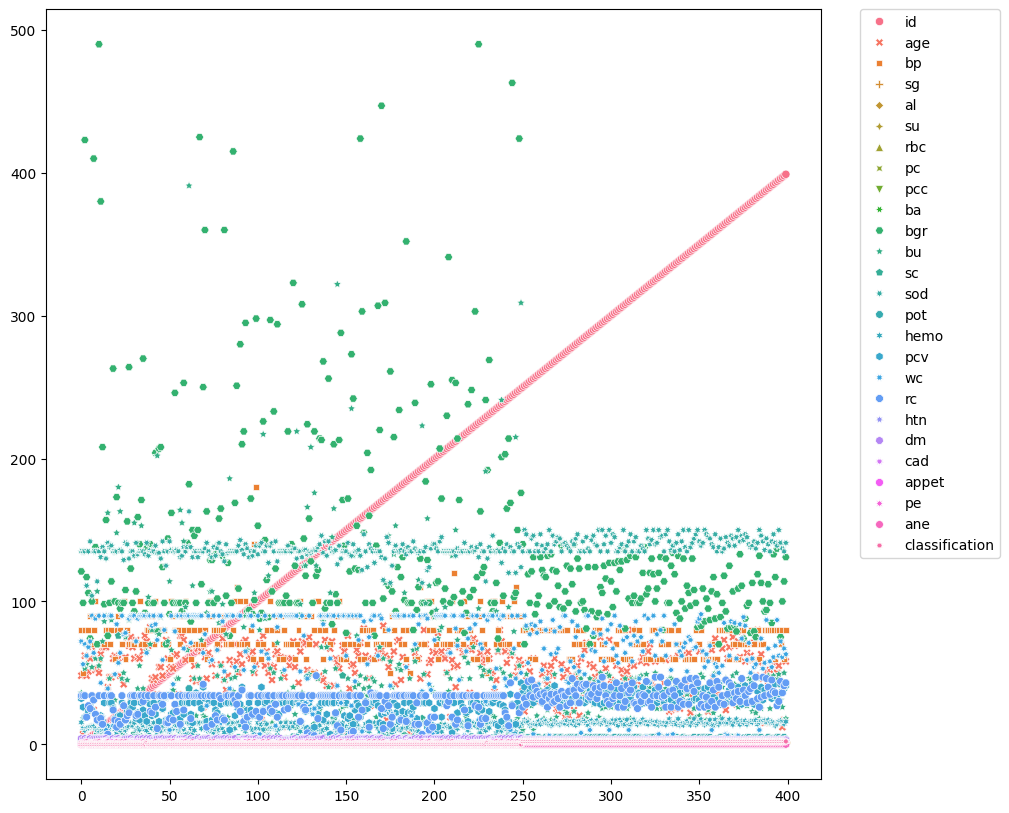

In [ ]:
plt.figure(figsize=(10,10)),
sns.scatterplot(data=dataset)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
sv.score(x_new,y_new)*100

100.0

In [ ]:
 y_pred = sv.predict(x_test)

In [ ]:
 from sklearn.metrics import classification_report,confusion_matrix
 print("Report:\n",classification_report(y_test,y_pred))
 confusion_matrix(y_test, y_pred)
 print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80

Confusion Matrix:
[[51  0  0]
 [ 1  0  0]
 [ 0  0 28]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


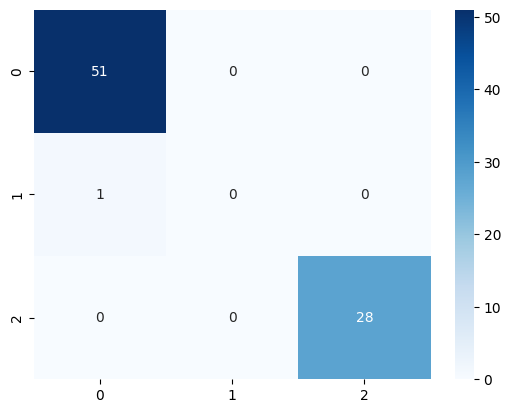

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.show()